In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def kalman(x, P, measurement, R, motion, Q, F, H):
  # distance between measured and current position-belief
  y = np.matrix(measurement).T - H*x
  
  # residual covariance
  S = H*P*H.T + R
  
  # Kalman gain
  K = P*H.T*S.I
  
  x = x + K*y
  
  # Identity matrix
  I = np.matrix(np.eye(F.shape[0]))
  
  P = (I - K*H)*P
  
  # Predict x, P
  x = F*x + motion
  P = F*P*F.T + Q
  
  return x, P

In [0]:
def kalman_xy(x, P, measurement, R):
  motion = np.matrix("0. 0. 0. 0.").T
  Q = np.matrix(np.eye(4))
  F = np.matrix('''
  1. 0. 1. 0.;
  0. 1. 0. 1.;
  0. 0. 1. 0.;
  0. 0. 0. 1.
  ''')
  H = np.matrix('''
  1. 0. 0. 0.;
  0. 1. 0. 0.
  ''')
  
  return kalman(x, P, measurement, R, motion, Q, F, H)

In [0]:
def main():
  x = np.matrix('0. 0. 0. 0.').T
  P = np.matrix(np.eye(4))*1000
  
  N = 20
  
  true_x = np.linspace(0.0, 10.0, N)
  true_y = true_x**2
  
  obs_x = true_x + 0.05*np.random.random(N)*true_x
  obs_y = true_y + 0.05*np.random.random(N)*true_y
  
  plt.plot(obs_x, obs_y, 'ro')
  
  result = []
  
  R = 0.01**2
  
  for meas in zip(obs_x, obs_y):
    x, P = kalman_xy(x, P, meas, R)
    result.append((x[:2]).tolist())

  kalman_x, kalman_y = zip(*result)
  
  plt.plot(kalman_x, kalman_y, 'g-')
  plt.show()
  

[[[0.0], [0.0]], [[1.0692851200742683], [0.5638247159769281]], [[1.6361726719299572], [1.8442228328981602]], [[2.1003326479532487], [3.6992427434482638]], [[2.7414280553210792], [6.227741257030415]], [[3.3228895328535066], [9.283777071215013]], [[3.632102256905322], [13.36245790002414]], [[4.453776337412951], [16.688895342273984]], [[4.7174761950769835], [22.839574382724155]], [[5.492905859403017], [27.685187928146124]], [[6.004631034198459], [33.23137123277873]], [[6.338735568507249], [40.661302127978345]], [[7.228311620421358], [46.52672815996263]], [[7.71383006803715], [54.33030217459246]], [[8.18664238901116], [63.98394232774476]], [[8.501419544530785], [70.9166897361557]], [[9.297464810250377], [81.05335685863352]], [[9.90946620329192], [89.67648555970028]], [[9.93070859595956], [101.79566693737743]], [[10.776948217202037], [112.71477480614372]]]


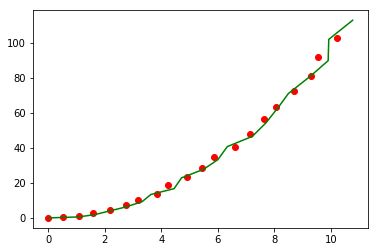

In [9]:
main()